# IMPORT PACKAGE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Link Sumber Dataset: https://www.kaggle.com/datasets/amjadzhour/car-price-prediction

# DATA SELECTION

In [259]:
df = pd.read_csv('Car_Price_Prediction.csv')

In [260]:
df.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   object 
 1   Model         1000 non-null   object 
 2   Year          1000 non-null   int64  
 3   Engine Size   1000 non-null   float64
 4   Mileage       1000 non-null   int64  
 5   Fuel Type     1000 non-null   object 
 6   Transmission  1000 non-null   object 
 7   Price         1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [262]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Make,1000,5,Ford,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,1000,5,Model B,212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,1000.0,NaN,NaN,NaN,2010.688,6.288577,2000.0,2005.0,2011.0,2016.0,2021.0
Engine Size,1000.0,NaN,NaN,NaN,2.7983,1.024137,1.0,1.9,2.8,3.7,4.5
Mileage,1000.0,NaN,NaN,NaN,97192.487,59447.31576,56.0,44768.75,94411.5,148977.75,199867.0
Fuel Type,1000,3,Diesel,344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,1000,2,Manual,511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,1000.0,NaN,NaN,NaN,25136.61553,5181.401368,6704.953524,21587.87837,25189.325247,28806.368974,41780.504635


# DATA PREPROCESSING

In [263]:
df.isnull().sum()

Make            0
Model           0
Year            0
Engine Size     0
Mileage         0
Fuel Type       0
Transmission    0
Price           0
dtype: int64

In [264]:
df.duplicated().sum()

np.int64(0)

In [265]:
dfs = df.copy()

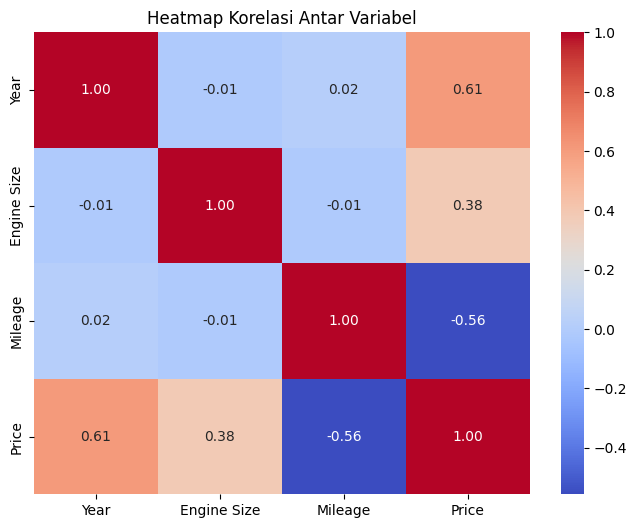

In [266]:
corr = df.corr(numeric_only=True)

# Membuat heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

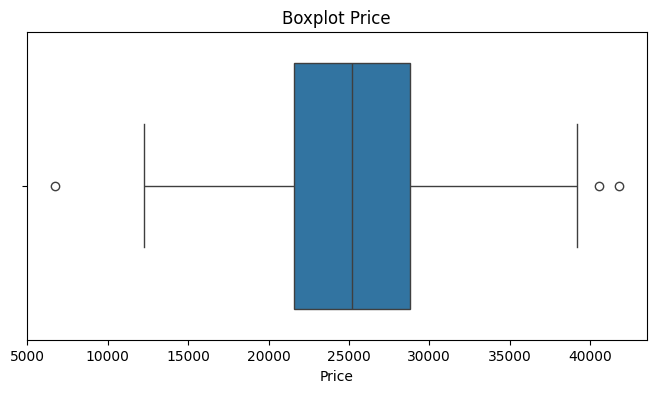

In [267]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Price'])
plt.title('Boxplot Price')
plt.show()

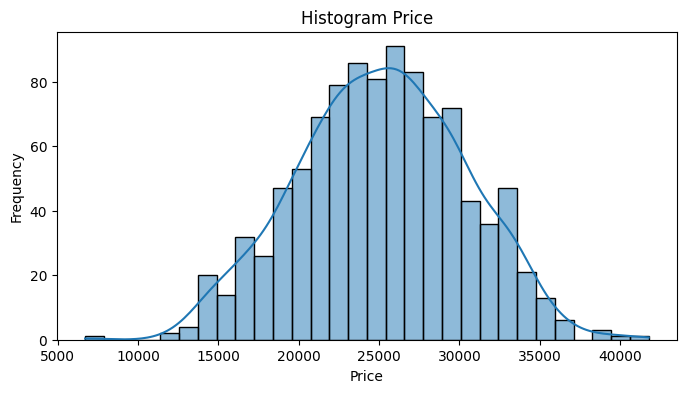

In [268]:
# ...existing code...
plt.figure(figsize=(8, 4))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Histogram Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
# ...existing code...

In [269]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

In [270]:
df = df[~((df['Price'] < (Q1 - 1.5 * IQR)) | (df['Price'] > (Q3 + 1.5 * IQR)))]

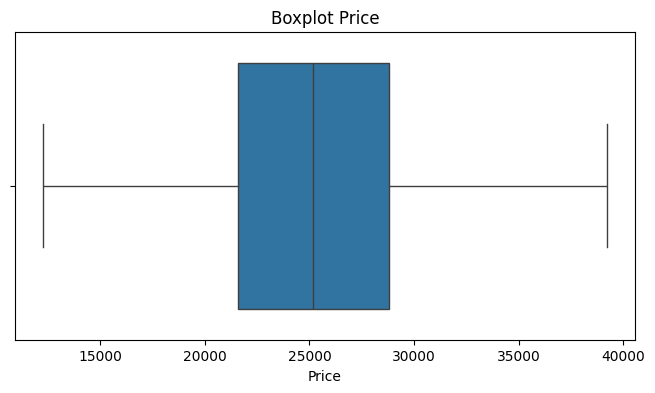

In [271]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Price'])
plt.title('Boxplot Price')
plt.show()

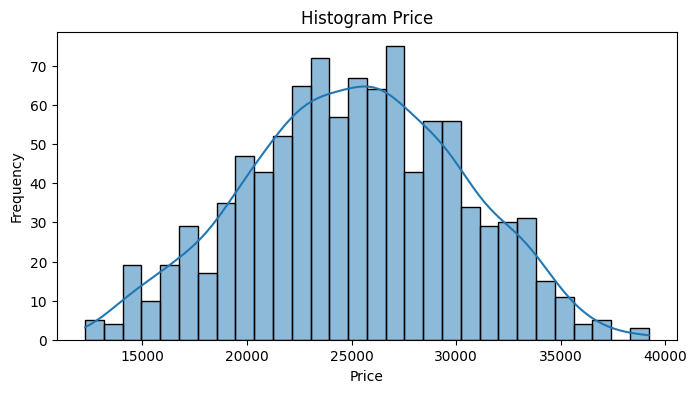

In [272]:
# ...existing code...
plt.figure(figsize=(8, 4))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Histogram Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
# ...existing code...

# EXPLORATORY DATA ANALYSIS

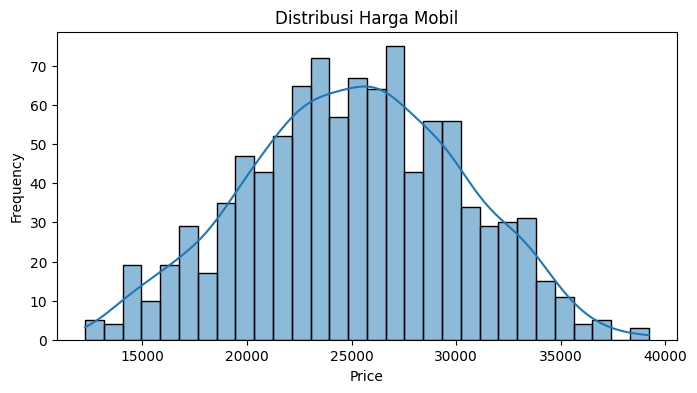

In [273]:
# 1. Distribusi harga mobil
plt.figure(figsize=(8,4))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribusi Harga Mobil')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

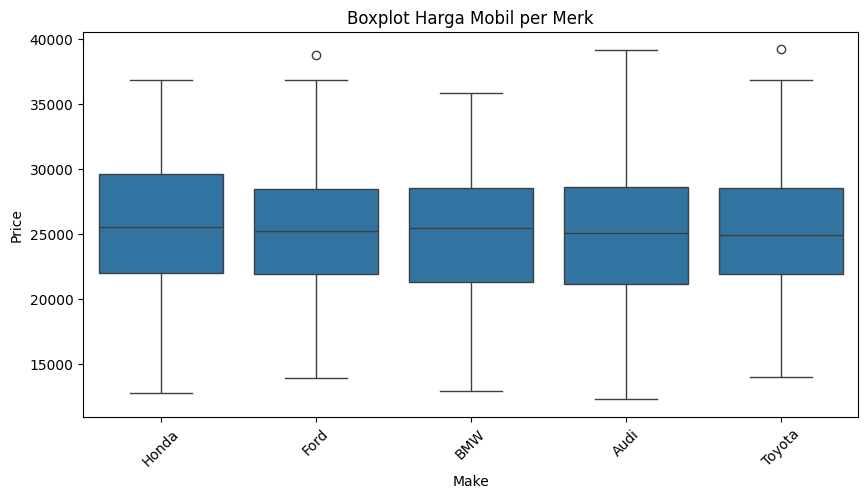

In [274]:
# 2. Boxplot harga mobil per merk
plt.figure(figsize=(10,5))
sns.boxplot(x='Make', y='Price', data=df)
plt.title('Boxplot Harga Mobil per Merk')
plt.xticks(rotation=45)
plt.show()

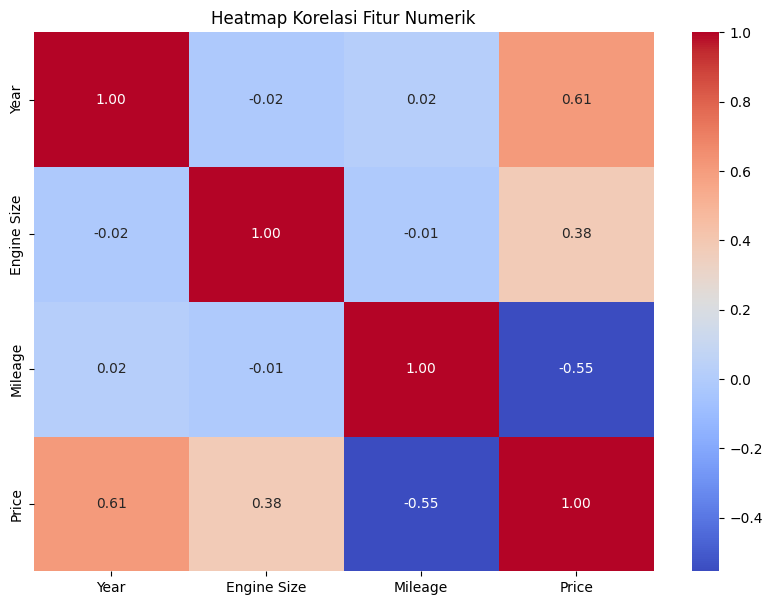

In [275]:
# 3. Korelasi antar fitur numerik
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

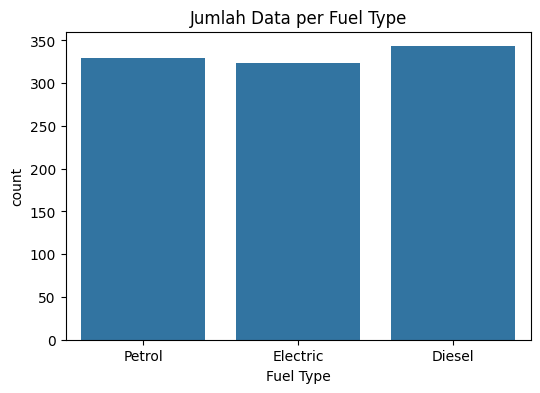

In [276]:
# 4. Jumlah data per Fuel Type
plt.figure(figsize=(6,4))
sns.countplot(x='Fuel Type', data=df)
plt.title('Jumlah Data per Fuel Type')
plt.show()

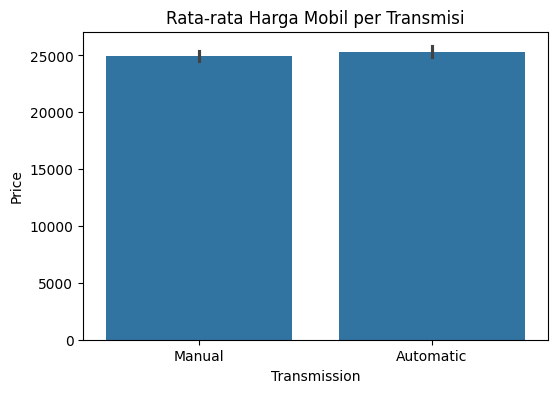

In [277]:
# 5. Rata-rata harga mobil berdasarkan transmisi
plt.figure(figsize=(6,4))
sns.barplot(x='Transmission', y='Price', data=df)
plt.title('Rata-rata Harga Mobil per Transmisi')
plt.show()

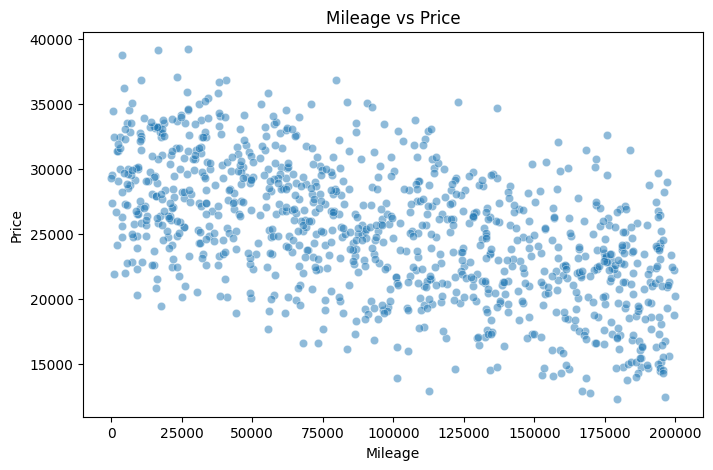

In [278]:
# 6. Scatterplot antara Mileage dan Price
plt.figure(figsize=(8,5))
sns.scatterplot(x='Mileage', y='Price', data=df, alpha=0.5)
plt.title('Mileage vs Price')
plt.show()

In [279]:
le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

In [280]:
df.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,3,1,2015,3.9,74176,2,1,30246.207931
1,2,2,2014,1.7,94799,1,0,22785.747684
2,1,1,2006,4.1,98385,1,1,25760.290347
3,3,1,2015,2.6,88919,1,0,25638.003491
4,3,2,2004,3.4,138482,2,0,21021.386657


# DATA SPLITTING

In [281]:
X = df.drop('Price', axis=1)
y = df['Price']

In [282]:
X

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission
0,3,1,2015,3.9,74176,2,1
1,2,2,2014,1.7,94799,1,0
2,1,1,2006,4.1,98385,1,1
3,3,1,2015,2.6,88919,1,0
4,3,2,2004,3.4,138482,2,0
...,...,...,...,...,...,...,...
995,4,3,2002,1.9,5445,2,1
996,3,1,2020,3.1,149112,0,1
997,2,2,2008,1.9,195387,2,0
998,4,0,2003,4.4,246,2,0


In [283]:
y

0      30246.207931
1      22785.747684
2      25760.290347
3      25638.003491
4      21021.386657
           ...     
995    22765.597091
996    30392.575567
997    16446.892292
998    27396.156708
999    31620.864907
Name: Price, Length: 997, dtype: float64

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CREATE MODEL (LINEAR REGRESSION)

In [285]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [286]:
X_train_scaled

array([[-0.69141546, -0.68415945,  1.66291516, ...,  0.37063224,
         1.23213938, -1.03447082],
       [-1.40337685,  0.03236497, -1.20544854, ..., -0.97170654,
         1.23213938,  0.96667783],
       [-0.69141546,  0.74888938,  0.06937977, ..., -0.3889574 ,
         1.23213938, -1.03447082],
       ...,
       [ 0.02054594,  0.74888938,  0.38808685, ..., -1.15332928,
         1.23213938,  0.96667783],
       [ 0.02054594,  0.03236497,  0.54744039, ...,  1.41606   ,
         1.23213938, -1.03447082],
       [ 1.44446873,  1.4654138 ,  1.34420809, ...,  1.34778863,
         0.01375838, -1.03447082]])

In [287]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [288]:
y_pred = lr.predict(X_test_scaled)

In [289]:
# Display Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Accuracy: {lr.score(X_test_scaled, y_test)}')

Mean Squared Error: 4672051.190715402
R-squared: 0.8422498165240215
Accuracy: 0.8422498165240215


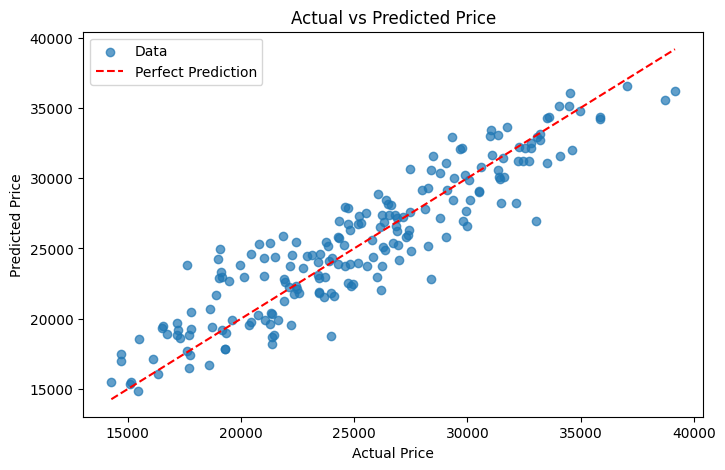

In [290]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, label='Data')
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.show()